________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-WestbrookV-__ipython-input__.get_data...
get_data()
_________________________________________________________get_data - 0.0s, 0.0min
3019.89199938
2841.83112513


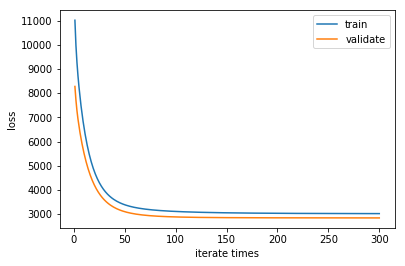

In [44]:
import sklearn
import numpy as np
from numpy.linalg import cholesky
#from numpy import random

from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")

@mem.cache
def get_data():
    data = load_svmlight_file('C:/Users/WestbrookV/Desktop/housing_scale')
    return data[0], data[1]

X, y = get_data()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=10)

#全零初始化w
w = np.zeros(14);
w = np.mat(w)
w = w.T
#随机初始化
#w = np.random.random(size=(14,1))
#正则初始化
#w = np.random.randn(14, 1)

ones = np.ones(X_train.shape[0])
ones = np.mat(ones)
ones = ones.T
X_train = X_train.todense()
X_train = np.column_stack((X_train,ones))

onesV = np.ones(X_test.shape[0])
onesV = np.mat(onesV)
onesV = onesV.T
X_test = X_test.todense()
X_test = np.column_stack((X_test,onesV))

y_train = np.mat(y_train)
y_train = y_train.T
y_test = np.mat(y_test)
y_test = y_test.T

iterator = 0 #迭代次数  
loss = 0     #loss值
loss_v = 0;  #loss验证
times = []   #迭代次数
loss_train = []   #loss值
loss_validate = []
Lambda = 0.5 #正则化参数
while True:
    w = w - 0.0007 *(Lambda * w + X_train.T * ( X_train*w - y_train ));# 0.0005是学习速率  
    iterator = iterator+1;  
    loss = 1/2*Lambda*(w.T*w) + 1/2*(y_train - X_train * w).T * (y_train - X_train * w)#loss函数
    loss_v =1/2*Lambda*(w.T*w) + 1/2*(y_test - X_test * w).T * (y_test - X_test * w)
    if (loss  < 5 or iterator>300): #如果误差小于5或者迭代次数大于100则停止  
        break;

    times.append(iterator) 
    loss_train.append(loss[0,0])
    loss_validate.append(loss_v[0,0])
    
print(loss_train[-1])
print(loss_validate[-1])

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
line_loss_train, = plt.plot(times , loss_train)
line_loss_validate, = plt.plot(times , loss_validate)
plt.xlabel('iterate times')# make axis labels
plt.ylabel('loss')
plt.legend([line_loss_train,line_loss_validate],['train','validate'])
plt.show()